# **LASSO FS**

Classification

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
# load dataset
data = pd.read_csv('impckd.csv')
data.shape

(400, 25)

In [ ]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((280, 24), (120, 24))

In [ ]:
scaler = StandardScaler() # standardization - scaling to unit variance
scaler.fit(X_train) # computes mean and SD of each feature

StandardScaler()

In [ ]:
sel_ = SelectFromModel( # feature selection class
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear' # small datasets
                       , random_state=10))

sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [ ]:
sel_.get_support()

array([False, False,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True, False,  True,  True, False, False,
        True,  True, False, False,  True, False])

In [ ]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 24
selected features: 12
features with coefficients shrank to zero: 12


In [ ]:
np.sum(sel_.estimator_.coef_ == 0)

12

In [ ]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['age', 'bp', 'pc', 'pcc', 'ba', 'bu', 'pot', 'wbcc', 'rbcc', 'cad',
       'appet', 'ane'],
      dtype='object')

In [ ]:
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)

X_train_selected.shape, X_test_selected.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((280, 12), (120, 12))

In [ ]:
l1_logit = LogisticRegression(C=0.5, penalty='l2', max_iter=300, random_state=10)
l1_logit.fit(scaler.transform(X_train), y_train)

np.sum(l1_logit.coef_ == 0)

0

Regression

In [ ]:
# load dataset

data = pd.read_csv('impckd.csv')
data.shape

(400, 25)

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(400, 25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((280, 24), (120, 24))

In [ ]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:

sel_ = SelectFromModel(Lasso(alpha=100, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=Lasso(alpha=100, random_state=10))

In [ ]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:

selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 24
selected features: 0
features with coefficients shrank to zero: 24


# **SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
dataset = pd.read_csv('LASSOFS.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = LinearSVC(penalty='l1', dual=False)
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, penalty='l1')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  98.75
Precision:  98.11320754716981
Recall:  100.0
F-measure:  99.05
AUC:  98.21
Gini coefficient:  96.43


In [ ]:
#svm with L2 penalty
svm_model1 = LinearSVC(penalty='l2', dual=False)
svm_model1.fit(X_train, y_train)
y_pred = svm_model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  98.75
Precision:  98.11320754716981
Recall:  100.0
F-measure:  99.05
AUC:  98.21
Gini coefficient:  96.43


# **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('LASSOFS.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", round(accuracy*100,2))
print("Precision: ", round(precision*100,2))
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  96.25
Precision:  98.0
F-measure:  97.03
AUC:  96.32
Gini coefficient:  92.63


# **ANN**

In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("LASSOFS.csv")
df.head()

,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe,class
0,1.020,1.0,0.0,0.810484,121.000000,1.2,137.528754,15.4,44.0,1.0,1.0,0.0,1
1,1.020,4.0,0.0,0.810484,148.036517,0.8,137.528754,11.3,38.0,0.0,0.0,0.0,1
2,1.010,2.0,3.0,1.000000,423.000000,1.8,137.528754,9.6,31.0,0.0,1.0,0.0,1
3,1.005,4.0,0.0,1.000000,117.000000,3.8,111.000000,11.2,32.0,1.0,0.0,1.0,1
4,1.010,2.0,0.0,1.000000,106.000000,1.4,137.528754,11.6,35.0,0.0,0.0,0.0,1


In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),              kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=X_train.shape[0])

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6786 - accuracy: 0.6094
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6683 - accuracy: 0.6156
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6582 - accuracy: 0.6187
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6483 - accuracy: 0.6187
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6387 - accuracy: 0.6187
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6291 - accuracy: 0.6187
Epoch 7/50
1/1 [==============================] - 0s 14ms/step - loss: 0.6197 - accuracy: 0.6187
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6105 - accuracy: 0.6625
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6012 - accuracy: 0.7594
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 0.5920 - accuracy: 0.8344
Epoch 11/50
1/1 [==============

In [ ]:
model.save("ckd.model")

In [ ]:
y_pred=model.predict(X_test)


3/3 [==============================] - 0s 3ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)


In [ ]:
for i in y_pred:
  if i<=0.5:
    y_pred[i]=0

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  96.25
Precision:  100.0
Recall:  94.23076923076923
F-measure:  97.03
AUC:  97.12
Gini coefficient:  94.23


# **CHAID**

In [ ]:
import pandas as pd
train = pd.read_csv("LASSOFS.csv")

In [ ]:
import numpy as np
X = train.drop('class', axis=1)
y = train['class']
X = np.array(X)
y = np.array(y)

In [ ]:
import numpy as np

class Node:

    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [ ]:
class DecisionTree:

    def __init__(self, alpha=0.05, min_samples=3,max_depth=7):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)


    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_pred

    def _traverse_tree(self, node, x):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)

    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))

        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])

        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2

        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)

        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2

    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()

In [ ]:
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffle_indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = shuffle_indices[:test_size]
    train_indices = shuffle_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
classifier = DecisionTree()

In [ ]:
classifier.fit(X_train , y_train)

<ipython-input-76-fe3e5a910934>:68: RuntimeWarning: invalid value encountered in true_divide
  chi2 = np.sum((observed - expected) ** 2 / expected)


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy*100,"%")
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore)

[[73  1]
 [ 3 43]]
Accuracy 96.66666666666667 %
Recall: 0.9605263157894737
Precision: 0.9864864864864865
F-score: 0.9733333333333333


# **C5.0**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Import Dataset
d=pd.read_csv('LASSOFS.csv')
d

,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe,class
0,1.020,1.0,0.0,0.810484,121.000000,1.2,137.528754,15.4,44.0,1.0,1.0,0.0,1
1,1.020,4.0,0.0,0.810484,148.036517,0.8,137.528754,11.3,38.0,0.0,0.0,0.0,1
2,1.010,2.0,3.0,1.000000,423.000000,1.8,137.528754,9.6,31.0,0.0,1.0,0.0,1
3,1.005,4.0,0.0,1.000000,117.000000,3.8,111.000000,11.2,32.0,1.0,0.0,1.0,1
4,1.010,2.0,0.0,1.000000,106.000000,1.4,137.528754,11.6,35.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,0.0,1.000000,140.000000,0.5,150.000000,15.7,47.0,0.0,0.0,0.0,0
396,1.025,0.0,0.0,1.000000,75.000000,1.2,141.000000,16.5,54.0,0.0,0.0,0.0,0
397,1.020,0.0,0.0,1.000000,100.000000,0.6,137.000000,15.8,49.0,0.0,0.0,0.0,0
398,1.025,0.0,0.0,1.000000,114.000000,1.0,135.000000,14.2,51.0,0.0,0.0,0.0,0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sg      400 non-null    float64
 1   al      400 non-null    float64
 2   su      400 non-null    float64
 3   rbc     400 non-null    float64
 4   bgr     400 non-null    float64
 5   sc      400 non-null    float64
 6   sod     400 non-null    float64
 7   hemo    400 non-null    float64
 8   pcv     400 non-null    float64
 9   htn     400 non-null    float64
 10  dm      400 non-null    float64
 11  pe      400 non-null    float64
 12  class   400 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 40.8 KB


In [ ]:
d['class'].unique()

array([1, 0])

In [ ]:
d['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [ ]:
# Apply Label Encoding
le=LabelEncoder()
d['class']=le.fit_transform(d['class'])
d['class']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [ ]:
d['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [ ]:
# Optionally list down column names
col_names=list(d.columns)
col_names

['sg',
 'al',
 'su',
 'rbc',
 'bgr',
 'sc',
 'sod',
 'hemo',
 'pcv',
 'htn',
 'dm',
 'pe',
 'class']

In [ ]:
d.shape

(400, 13)

In [ ]:
x=d.iloc[:,0:12]
x

,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe
0,1.020,1.0,0.0,0.810484,121.000000,1.2,137.528754,15.4,44.0,1.0,1.0,0.0
1,1.020,4.0,0.0,0.810484,148.036517,0.8,137.528754,11.3,38.0,0.0,0.0,0.0
2,1.010,2.0,3.0,1.000000,423.000000,1.8,137.528754,9.6,31.0,0.0,1.0,0.0
3,1.005,4.0,0.0,1.000000,117.000000,3.8,111.000000,11.2,32.0,1.0,0.0,1.0
4,1.010,2.0,0.0,1.000000,106.000000,1.4,137.528754,11.6,35.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,0.0,1.000000,140.000000,0.5,150.000000,15.7,47.0,0.0,0.0,0.0
396,1.025,0.0,0.0,1.000000,75.000000,1.2,141.000000,16.5,54.0,0.0,0.0,0.0
397,1.020,0.0,0.0,1.000000,100.000000,0.6,137.000000,15.8,49.0,0.0,0.0,0.0
398,1.025,0.0,0.0,1.000000,114.000000,1.0,135.000000,14.2,51.0,0.0,0.0,0.0


In [ ]:
y=d['class']
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [ ]:
# Splitting data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# C5.0 Entropy - Training the Model
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# C5.0 Entropy - Trained Model Accuracy
model_entropy.score(x_train,y_train)

0.9875

[Text(0.5, 0.875, 'x[7] <= 13.15\nentropy = 0.963\nsamples = 320\nvalue = [124, 196]'),
 Text(0.3, 0.625, 'x[5] <= 1.25\nentropy = 0.253\nsamples = 189\nvalue = [8, 181]'),
 Text(0.2, 0.375, 'x[3] <= 0.905\nentropy = 0.776\nsamples = 35\nvalue = [8, 27]'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.3, 0.125, 'entropy = 0.918\nsamples = 12\nvalue = [8, 4]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 154\nvalue = [0, 154]'),
 Text(0.7, 0.625, 'x[0] <= 1.016\nentropy = 0.513\nsamples = 131\nvalue = [116, 15]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.8, 0.375, 'x[9] <= 0.685\nentropy = 0.17\nsamples = 119\nvalue = [116, 3]'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 116\nvalue = [116, 0]'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

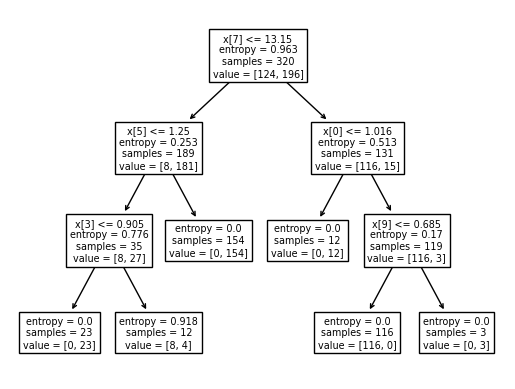

In [ ]:
# Plot the decision tree
tree.plot_tree(model_entropy)

[Text(0.5, 0.875, 'pcc <= 13.15\nentropy = 0.963\nsamples = 320\nvalue = [124, 196]\nclass = notckd'),
 Text(0.3, 0.625, 'rbc <= 1.25\nentropy = 0.253\nsamples = 189\nvalue = [8, 181]\nclass = notckd'),
 Text(0.2, 0.375, 'al <= 0.905\nentropy = 0.776\nsamples = 35\nvalue = [8, 27]\nclass = notckd'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]\nclass = notckd'),
 Text(0.3, 0.125, 'entropy = 0.918\nsamples = 12\nvalue = [8, 4]\nclass = ckd'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 154\nvalue = [0, 154]\nclass = notckd'),
 Text(0.7, 0.625, 'age <= 1.016\nentropy = 0.513\nsamples = 131\nvalue = [116, 15]\nclass = ckd'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = notckd'),
 Text(0.8, 0.375, 'bgr <= 0.685\nentropy = 0.17\nsamples = 119\nvalue = [116, 3]\nclass = ckd'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 116\nvalue = [116, 0]\nclass = ckd'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = notckd')]

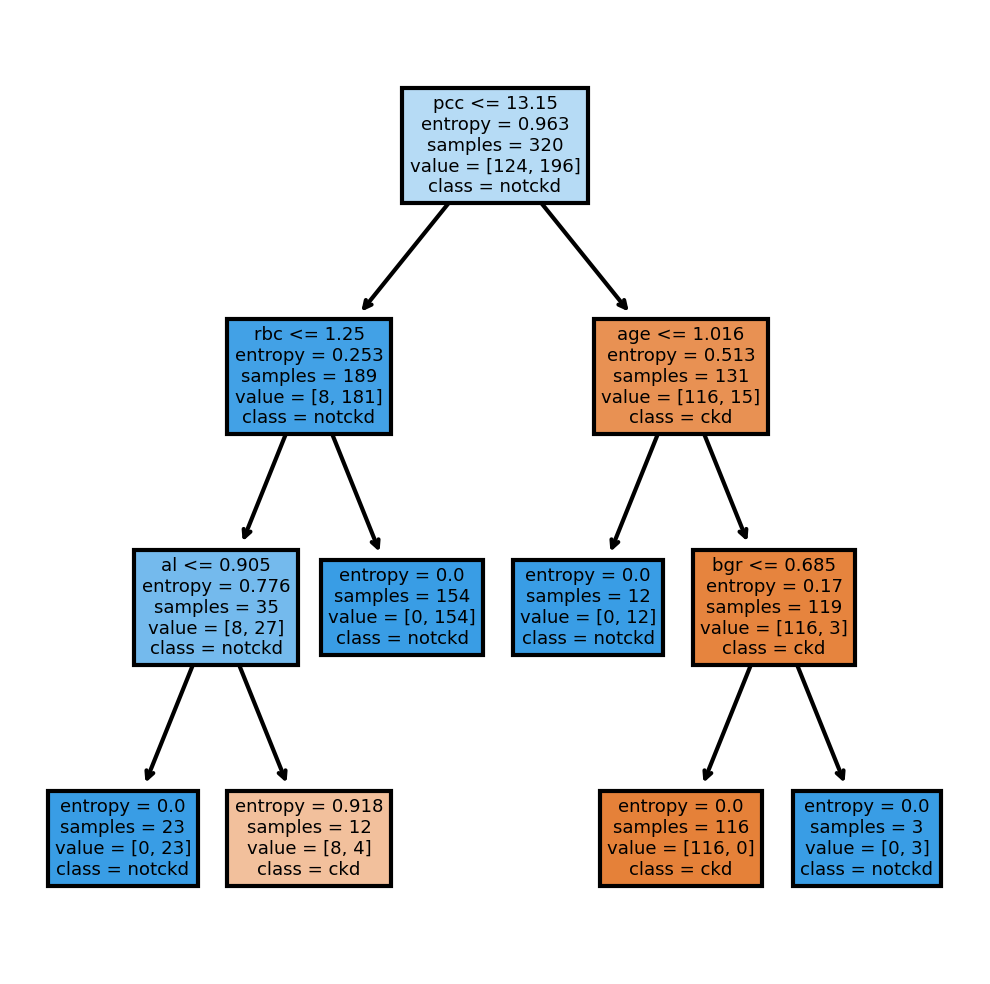

In [ ]:
# For better visualization of Decision Tree
fig=plt.figure(figsize=(4,4),dpi=300)
fn=['age', 'bp', 'sg', 'al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane', 'class']
cn=['ckd', 'notckd']
tree.plot_tree(model_entropy,feature_names=fn,class_names=cn,filled=True)

In [ ]:
# Predicting on test data
pred=model_entropy.predict(x_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
pd.Series(pred).value_counts() # For value_count of array

1    51
0    29
dtype: int64

In [ ]:
y_test.value_counts()

1    54
0    26
Name: class, dtype: int64

In [ ]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,pred)

col_0,0,1
class,,
0,26,0
1,3,51


In [ ]:
# C5.0 Entropy - Test Model Accuracy
acc = model_entropy.score(x_test,y_test)

In [ ]:
print("Accuracy : ",acc*100,'%')

Accuracy :  96.25 %


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred)
f_measure = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
gini_coefficient = 2 * roc_auc_score(y_test, pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  96.25
Precision:  100.0
Recall:  94.44444444444444
F-measure:  97.14
AUC:  97.22
Gini coefficient:  94.44


# **KNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv("LASSOFS.csv")
df.head()

,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe,class
0,1.020,1.0,0.0,0.810484,121.000000,1.2,137.528754,15.4,44.0,1.0,1.0,0.0,1
1,1.020,4.0,0.0,0.810484,148.036517,0.8,137.528754,11.3,38.0,0.0,0.0,0.0,1
2,1.010,2.0,3.0,1.000000,423.000000,1.8,137.528754,9.6,31.0,0.0,1.0,0.0,1
3,1.005,4.0,0.0,1.000000,117.000000,3.8,111.000000,11.2,32.0,1.0,0.0,1.0,1
4,1.010,2.0,0.0,1.000000,106.000000,1.4,137.528754,11.6,35.0,0.0,0.0,0.0,1


In [ ]:
df.shape

(400, 13)

In [ ]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

In [ ]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print(y_pred)

[1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1
 1 1 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  93.75
Precision:  96.07843137254902
Recall:  94.23076923076923
F-measure:  95.15
AUC:  93.54
Gini coefficient:  87.09


# **RANDOM TREE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv("LASSOFS.csv")

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  96.25
Precision:  100.0
Recall:  94.23076923076923
F-measure:  97.03
AUC:  97.12
Gini coefficient:  94.23


# **WRAPPER FS**

In [ ]:
import pandas as pd
df=pd.read_csv('impckd.csv')

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,140.000000,...,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,75.000000,...,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,1.000000,1.0,0.0,0.0,100.000000,...,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,1.000000,1.0,0.0,0.0,114.000000,...,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
X=df.drop(columns=['class'])
y=df['class']

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=6,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sfs.fit(X, y)
new_df=sfs.k_feature_names_

In [ ]:
new_df

('sg', 'al', 'rbc', 'hemo', 'htn', 'dm')

In [ ]:
x=df.loc[:,new_df]

In [ ]:
W_df=pd.concat([x,df['class']],axis=1)

In [ ]:
W_df

,sg,al,rbc,hemo,htn,dm,class
0,1.020,1.0,0.810484,15.4,1.0,1.0,1
1,1.020,4.0,0.810484,11.3,0.0,0.0,1
2,1.010,2.0,1.000000,9.6,0.0,1.0,1
3,1.005,4.0,1.000000,11.2,1.0,0.0,1
4,1.010,2.0,1.000000,11.6,0.0,0.0,1
...,...,...,...,...,...,...,...
395,1.020,0.0,1.000000,15.7,0.0,0.0,0
396,1.025,0.0,1.000000,16.5,0.0,0.0,0
397,1.020,0.0,1.000000,15.8,0.0,0.0,0
398,1.025,0.0,1.000000,14.2,0.0,0.0,0


In [ ]:
W_df.to_csv("wrapper_ckd.csv",index=0)

In [ ]:
x=pd.read_csv("wrapper_ckd.csv")
x

,sg,al,rbc,hemo,htn,dm,class
0,1.020,1.0,0.810484,15.4,1.0,1.0,1
1,1.020,4.0,0.810484,11.3,0.0,0.0,1
2,1.010,2.0,1.000000,9.6,0.0,1.0,1
3,1.005,4.0,1.000000,11.2,1.0,0.0,1
4,1.010,2.0,1.000000,11.6,0.0,0.0,1
...,...,...,...,...,...,...,...
395,1.020,0.0,1.000000,15.7,0.0,0.0,0
396,1.025,0.0,1.000000,16.5,0.0,0.0,0
397,1.020,0.0,1.000000,15.8,0.0,0.0,0
398,1.025,0.0,1.000000,14.2,0.0,0.0,0


# **SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
dataset = pd.read_csv('wrapper_ckd.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = LinearSVC(penalty='l1', dual=False)
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, penalty='l1')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  98.75
Precision:  98.11320754716981
Recall:  100.0
F-measure:  99.05
AUC:  98.21
Gini coefficient:  96.43


In [ ]:
#svm with L2 penalty
svm_model1 = LinearSVC(penalty='l2', dual=False)
svm_model1.fit(X_train, y_train)
y_pred = svm_model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  98.75
Precision:  98.11320754716981
Recall:  100.0
F-measure:  99.05
AUC:  98.21
Gini coefficient:  96.43


# **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('wrapper_ckd.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", round(accuracy*100,2))
print("Precision: ", round(precision*100,2))
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  95.0
Precision:  96.08
F-measure:  96.08
AUC:  94.59
Gini coefficient:  89.18


# **ANN**

In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("wrapper_ckd.csv")
df.head()

,sg,al,rbc,hemo,htn,dm,class
0,1.020,1.0,0.810484,15.4,1.0,1.0,1
1,1.020,4.0,0.810484,11.3,0.0,0.0,1
2,1.010,2.0,1.000000,9.6,0.0,1.0,1
3,1.005,4.0,1.000000,11.2,1.0,0.0,1
4,1.010,2.0,1.000000,11.6,0.0,0.0,1


In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),              kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=X_train.shape[0])

Epoch 1/50
1/1 [==============================] - 1s 573ms/step - loss: 0.6929 - accuracy: 0.6250
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6848 - accuracy: 0.8094
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6770 - accuracy: 0.9187
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6695 - accuracy: 0.9500
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6621 - accuracy: 0.9625
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6549 - accuracy: 0.9688
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6478 - accuracy: 0.9688
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6408 - accuracy: 0.9688
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6339 - accuracy: 0.9688
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6271 - accuracy: 0.9688
Epoch 11/50
1/1 [===================

In [ ]:
model.save("ckd.model")

In [ ]:
y_pred=model.predict(X_test)


3/3 [==============================] - 0s 5ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)


In [ ]:
for i in y_pred:
  if i<=0.5:
    y_pred[i]=0

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  97.5
Precision:  100.0
Recall:  96.15384615384616
F-measure:  98.04
AUC:  98.08
Gini coefficient:  96.15


# **CHAID**

In [ ]:
import pandas as pd
train = pd.read_csv("wrapper_ckd.csv")

In [ ]:
import numpy as np
X = train.drop('class', axis=1)
y = train['class']
X = np.array(X)
y = np.array(y)

In [ ]:
import numpy as np

class Node:

    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [ ]:
class DecisionTree:

    def __init__(self, alpha=0.05, min_samples=3,max_depth=7):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)


    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_pred

    def _traverse_tree(self, node, x):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)

    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))

        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])

        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2

        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)

        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2

    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()

In [ ]:
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffle_indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = shuffle_indices[:test_size]
    train_indices = shuffle_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
classifier = DecisionTree()

In [ ]:
classifier.fit(X_train , y_train)

<ipython-input-168-fe3e5a910934>:68: RuntimeWarning: invalid value encountered in true_divide
  chi2 = np.sum((observed - expected) ** 2 / expected)


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy*100,"%")
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore)

[[76  1]
 [ 0 43]]
Accuracy 99.16666666666667 %
Recall: 1.0
Precision: 0.987012987012987
F-score: 0.9934640522875817


# **C5.0**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Import Dataset
d=pd.read_csv('wrapper_ckd.csv')
d

,sg,al,rbc,hemo,htn,dm,class
0,1.020,1.0,0.810484,15.4,1.0,1.0,1
1,1.020,4.0,0.810484,11.3,0.0,0.0,1
2,1.010,2.0,1.000000,9.6,0.0,1.0,1
3,1.005,4.0,1.000000,11.2,1.0,0.0,1
4,1.010,2.0,1.000000,11.6,0.0,0.0,1
...,...,...,...,...,...,...,...
395,1.020,0.0,1.000000,15.7,0.0,0.0,0
396,1.025,0.0,1.000000,16.5,0.0,0.0,0
397,1.020,0.0,1.000000,15.8,0.0,0.0,0
398,1.025,0.0,1.000000,14.2,0.0,0.0,0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sg      400 non-null    float64
 1   al      400 non-null    float64
 2   rbc     400 non-null    float64
 3   hemo    400 non-null    float64
 4   htn     400 non-null    float64
 5   dm      400 non-null    float64
 6   class   400 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 22.0 KB


In [ ]:
d['class'].unique()

array([1, 0])

In [ ]:
d['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [ ]:
# Apply Label Encoding
le=LabelEncoder()
d['class']=le.fit_transform(d['class'])
d['class']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [ ]:
d['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [ ]:
# Optionally list down column names
col_names=list(d.columns)
col_names

['sg', 'al', 'rbc', 'hemo', 'htn', 'dm', 'class']

In [ ]:
d.shape

(400, 7)

In [ ]:
x=d.iloc[:,0:12]
x

,sg,al,rbc,hemo,htn,dm,class
0,1.020,1.0,0.810484,15.4,1.0,1.0,1
1,1.020,4.0,0.810484,11.3,0.0,0.0,1
2,1.010,2.0,1.000000,9.6,0.0,1.0,1
3,1.005,4.0,1.000000,11.2,1.0,0.0,1
4,1.010,2.0,1.000000,11.6,0.0,0.0,1
...,...,...,...,...,...,...,...
395,1.020,0.0,1.000000,15.7,0.0,0.0,0
396,1.025,0.0,1.000000,16.5,0.0,0.0,0
397,1.020,0.0,1.000000,15.8,0.0,0.0,0
398,1.025,0.0,1.000000,14.2,0.0,0.0,0


In [ ]:
y=d['class']
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [ ]:
# Splitting data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# C5.0 Entropy - Training the Model
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# C5.0 Entropy - Trained Model Accuracy
model_entropy.score(x_train,y_train)

1.0

[Text(0.5, 0.75, 'x[6] <= 0.5\nentropy = 0.963\nsamples = 320\nvalue = [124, 196]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 196\nvalue = [0, 196]')]

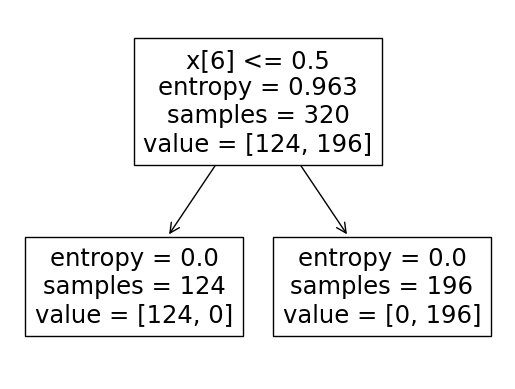

In [ ]:
# Plot the decision tree
tree.plot_tree(model_entropy)

[Text(0.5, 0.75, 'pc <= 0.5\nentropy = 0.963\nsamples = 320\nvalue = [124, 196]\nclass = notckd'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 124\nvalue = [124, 0]\nclass = ckd'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 196\nvalue = [0, 196]\nclass = notckd')]

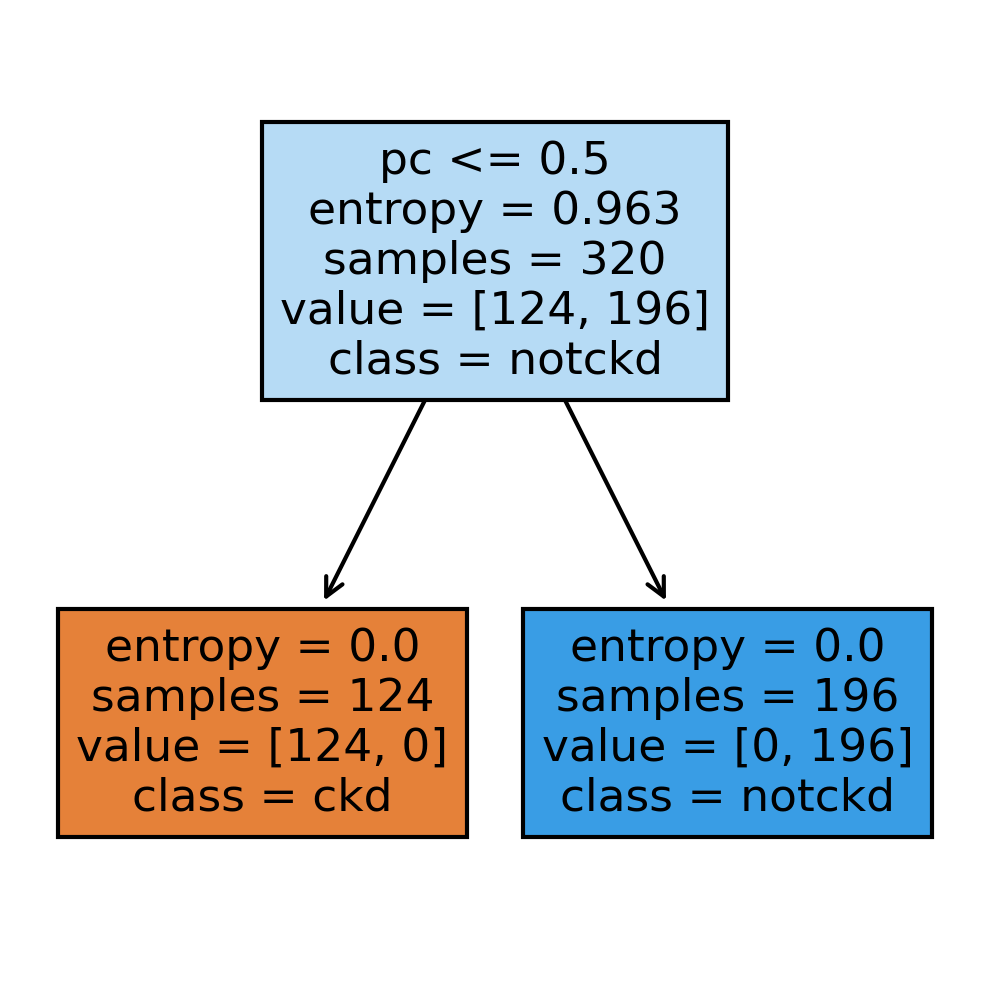

In [ ]:
# For better visualization of Decision Tree
fig=plt.figure(figsize=(4,4),dpi=300)
fn=['age', 'bp', 'sg', 'al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane', 'class']
cn=['ckd', 'notckd']
tree.plot_tree(model_entropy,feature_names=fn,class_names=cn,filled=True)

In [ ]:
# Predicting on test data
pred=model_entropy.predict(x_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
pd.Series(pred).value_counts() # For value_count of array

1    54
0    26
dtype: int64

In [ ]:
y_test.value_counts()

1    54
0    26
Name: class, dtype: int64

In [ ]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,pred)

col_0,0,1
class,,
0,26,0
1,0,54


In [ ]:
# C5.0 Entropy - Test Model Accuracy
acc = model_entropy.score(x_test,y_test)

In [ ]:
print("Accuracy : ",acc*100,'%')

Accuracy :  100.0 %


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred)
f_measure = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
gini_coefficient = 2 * roc_auc_score(y_test, pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


# **KNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv("wrapper_ckd.csv")
df.head()

,sg,al,rbc,hemo,htn,dm,class
0,1.020,1.0,0.810484,15.4,1.0,1.0,1
1,1.020,4.0,0.810484,11.3,0.0,0.0,1
2,1.010,2.0,1.000000,9.6,0.0,1.0,1
3,1.005,4.0,1.000000,11.2,1.0,0.0,1
4,1.010,2.0,1.000000,11.6,0.0,0.0,1


In [ ]:
df.shape

(400, 7)

In [ ]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

In [ ]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print(y_pred)

[1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 1 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  96.25
Precision:  98.0392156862745
Recall:  96.15384615384616
F-measure:  97.09
AUC:  96.29
Gini coefficient:  92.58


# **RANDOM TREE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv("wrapper_ckd.csv")

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


# **FILTER FS**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)

In [ ]:
data = pd.read_csv('impckd.csv')

In [ ]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [ ]:
corr = data.corr()
corr.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.143495,-0.191886,0.129241,0.212953,-0.066361,-0.143869,0.160948,0.044241,0.220452,...,-0.218024,0.108774,-0.205838,0.398671,0.370635,0.239242,-0.165392,0.102865,0.050552,0.240057
bp,0.143495,1.000000,-0.182463,0.146593,0.200784,-0.197767,-0.170651,0.057705,0.110874,0.149100,...,-0.292714,0.026067,-0.220822,0.267574,0.225455,0.085333,-0.176101,0.052613,0.193717,0.290600
sg,-0.191886,-0.182463,1.000000,-0.466698,-0.287993,0.331715,0.361897,-0.289162,-0.219679,-0.326339,...,0.528437,-0.201311,0.466976,-0.362065,-0.388565,-0.152670,0.246286,-0.271970,-0.212814,-0.698957
al,0.129241,0.146593,-0.466698,1.000000,0.268070,-0.381913,-0.547333,0.397215,0.366012,0.326400,...,-0.527242,0.200443,-0.454886,0.479359,0.375631,0.235574,-0.329650,0.440051,0.281525,0.599238
su,0.212953,0.200784,-0.287993,0.268070,1.000000,-0.118297,-0.188632,0.150019,0.106649,0.639186,...,-0.202573,0.153274,-0.182278,0.291929,0.471360,0.246089,-0.080117,0.130227,0.065901,0.327812


<Axes: >

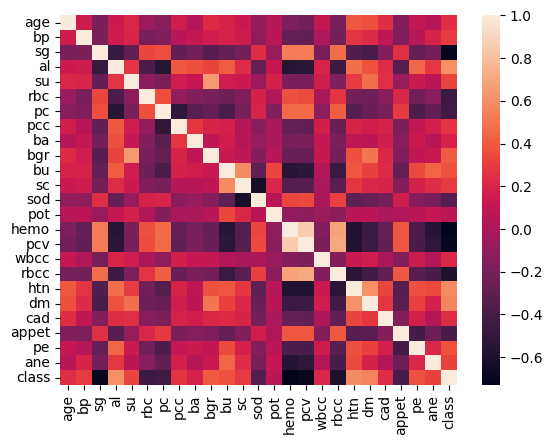

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = data.columns[columns]
selected_columns.shape


(18,)

In [ ]:
dataF_new=data.drop(selected_columns,axis=1)
dataF_new


,bgr,sc,hemo,pcv,rbcc,dm,class
0,121.000000,1.2,15.4,44.0,5.200000,1.0,1
1,148.036517,0.8,11.3,38.0,4.707435,0.0,1
2,423.000000,1.8,9.6,31.0,4.707435,1.0,1
3,117.000000,3.8,11.2,32.0,3.900000,0.0,1
4,106.000000,1.4,11.6,35.0,4.600000,0.0,1
...,...,...,...,...,...,...,...
395,140.000000,0.5,15.7,47.0,4.900000,0.0,0
396,75.000000,1.2,16.5,54.0,6.200000,0.0,0
397,100.000000,0.6,15.8,49.0,5.400000,0.0,0
398,114.000000,1.0,14.2,51.0,5.900000,0.0,0


In [ ]:
# Write the dataframe to a new CSV file
dataF_new.to_csv('Filter_Output.csv',index=False)

# **SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
dataset = pd.read_csv('Filter_Output.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = LinearSVC(penalty='l1', dual=False)
svm_model.fit(X_train, y_train)

LinearSVC(dual=False, penalty='l1')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  97.5
Precision:  98.07692307692307
Recall:  98.07692307692307
F-measure:  98.08
AUC:  97.25
Gini coefficient:  94.51


In [ ]:
#svm with L2 penalty
svm_model1 = LinearSVC(penalty='l2', dual=False)
svm_model1.fit(X_train, y_train)
y_pred = svm_model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  97.5
Precision:  98.07692307692307
Recall:  98.07692307692307
F-measure:  98.08
AUC:  97.25
Gini coefficient:  94.51


# **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('Filter_Output.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", round(accuracy*100,2))
print("Precision: ", round(precision*100,2))
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  93.75
Precision:  96.94
F-measure:  95.0
AUC:  93.98
Gini coefficient:  87.96


# **ANN**

In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Filter_Output.csv")
df.head()

,bgr,sc,hemo,pcv,rbcc,dm,class
0,121.000000,1.2,15.4,44.0,5.200000,1.0,1
1,148.036517,0.8,11.3,38.0,4.707435,0.0,1
2,423.000000,1.8,9.6,31.0,4.707435,1.0,1
3,117.000000,3.8,11.2,32.0,3.900000,0.0,1
4,106.000000,1.4,11.6,35.0,4.600000,0.0,1


In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),              kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=X_train.shape[0])

Epoch 1/50
1/1 [==============================] - 1s 769ms/step - loss: 0.6910 - accuracy: 0.6187
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6864 - accuracy: 0.6187
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6819 - accuracy: 0.6187
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6774 - accuracy: 0.6187
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6731 - accuracy: 0.6187
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6689 - accuracy: 0.6187
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6647 - accuracy: 0.6187
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6605 - accuracy: 0.6187
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6564 - accuracy: 0.6187
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6524 - accuracy: 0.6187
Epoch 11/50
1/1 [=================

In [ ]:
model.save("ckd.model")

In [ ]:
y_pred=model.predict(X_test)


3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)


In [ ]:
for i in y_pred:
  if i<=0.5:
    y_pred[i]=0

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  95.0
Precision:  100.0
Recall:  92.3076923076923
F-measure:  96.0
AUC:  96.15
Gini coefficient:  92.31


# **CHAID**

In [ ]:
import pandas as pd
train = pd.read_csv("Filter_Output.csv")

In [ ]:
import numpy as np
X = train.drop('class', axis=1)
y = train['class']
X = np.array(X)
y = np.array(y)

In [ ]:
import numpy as np

class Node:

    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [ ]:
class DecisionTree:

    def __init__(self, alpha=0.05, min_samples=3,max_depth=7):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)


    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_pred

    def _traverse_tree(self, node, x):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)

    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))

        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])

        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2

        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)

        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2

    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()

In [ ]:
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffle_indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = shuffle_indices[:test_size]
    train_indices = shuffle_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
classifier = DecisionTree()

In [ ]:
classifier.fit(X_train , y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy*100,"%")
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore)

[[74  0]
 [ 2 44]]
Accuracy 98.33333333333333 %
Recall: 0.9736842105263158
Precision: 1.0
F-score: 0.9866666666666666


# **C5.0**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Import Dataset
d=pd.read_csv('Filter_Output.csv')
d

,bgr,sc,hemo,pcv,rbcc,dm,class
0,121.000000,1.2,15.4,44.0,5.200000,1.0,1
1,148.036517,0.8,11.3,38.0,4.707435,0.0,1
2,423.000000,1.8,9.6,31.0,4.707435,1.0,1
3,117.000000,3.8,11.2,32.0,3.900000,0.0,1
4,106.000000,1.4,11.6,35.0,4.600000,0.0,1
...,...,...,...,...,...,...,...
395,140.000000,0.5,15.7,47.0,4.900000,0.0,0
396,75.000000,1.2,16.5,54.0,6.200000,0.0,0
397,100.000000,0.6,15.8,49.0,5.400000,0.0,0
398,114.000000,1.0,14.2,51.0,5.900000,0.0,0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bgr     400 non-null    float64
 1   sc      400 non-null    float64
 2   hemo    400 non-null    float64
 3   pcv     400 non-null    float64
 4   rbcc    400 non-null    float64
 5   dm      400 non-null    float64
 6   class   400 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 22.0 KB


In [ ]:
d['class'].unique()

array([1, 0])

In [ ]:
d['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [ ]:
# Apply Label Encoding
le=LabelEncoder()
d['class']=le.fit_transform(d['class'])
d['class']

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [ ]:
d['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [ ]:
# Optionally list down column names
col_names=list(d.columns)
col_names

['bgr', 'sc', 'hemo', 'pcv', 'rbcc', 'dm', 'class']

In [ ]:
d.shape

(400, 7)

In [ ]:
x=d.iloc[:,0:12]
x

,bgr,sc,hemo,pcv,rbcc,dm,class
0,121.000000,1.2,15.4,44.0,5.200000,1.0,1
1,148.036517,0.8,11.3,38.0,4.707435,0.0,1
2,423.000000,1.8,9.6,31.0,4.707435,1.0,1
3,117.000000,3.8,11.2,32.0,3.900000,0.0,1
4,106.000000,1.4,11.6,35.0,4.600000,0.0,1
...,...,...,...,...,...,...,...
395,140.000000,0.5,15.7,47.0,4.900000,0.0,0
396,75.000000,1.2,16.5,54.0,6.200000,0.0,0
397,100.000000,0.6,15.8,49.0,5.400000,0.0,0
398,114.000000,1.0,14.2,51.0,5.900000,0.0,0


In [ ]:
y=d['class']
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

In [ ]:
# Splitting data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# C5.0 Entropy - Training the Model
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# C5.0 Entropy - Trained Model Accuracy
model_entropy.score(x_train,y_train)

1.0

[Text(0.5, 0.75, 'x[6] <= 0.5\nentropy = 0.963\nsamples = 320\nvalue = [124, 196]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 196\nvalue = [0, 196]')]

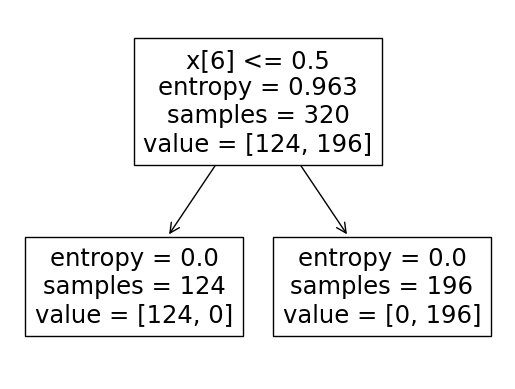

In [ ]:
# Plot the decision tree
tree.plot_tree(model_entropy)

[Text(0.5, 0.75, 'pc <= 0.5\nentropy = 0.963\nsamples = 320\nvalue = [124, 196]\nclass = notckd'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 124\nvalue = [124, 0]\nclass = ckd'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 196\nvalue = [0, 196]\nclass = notckd')]

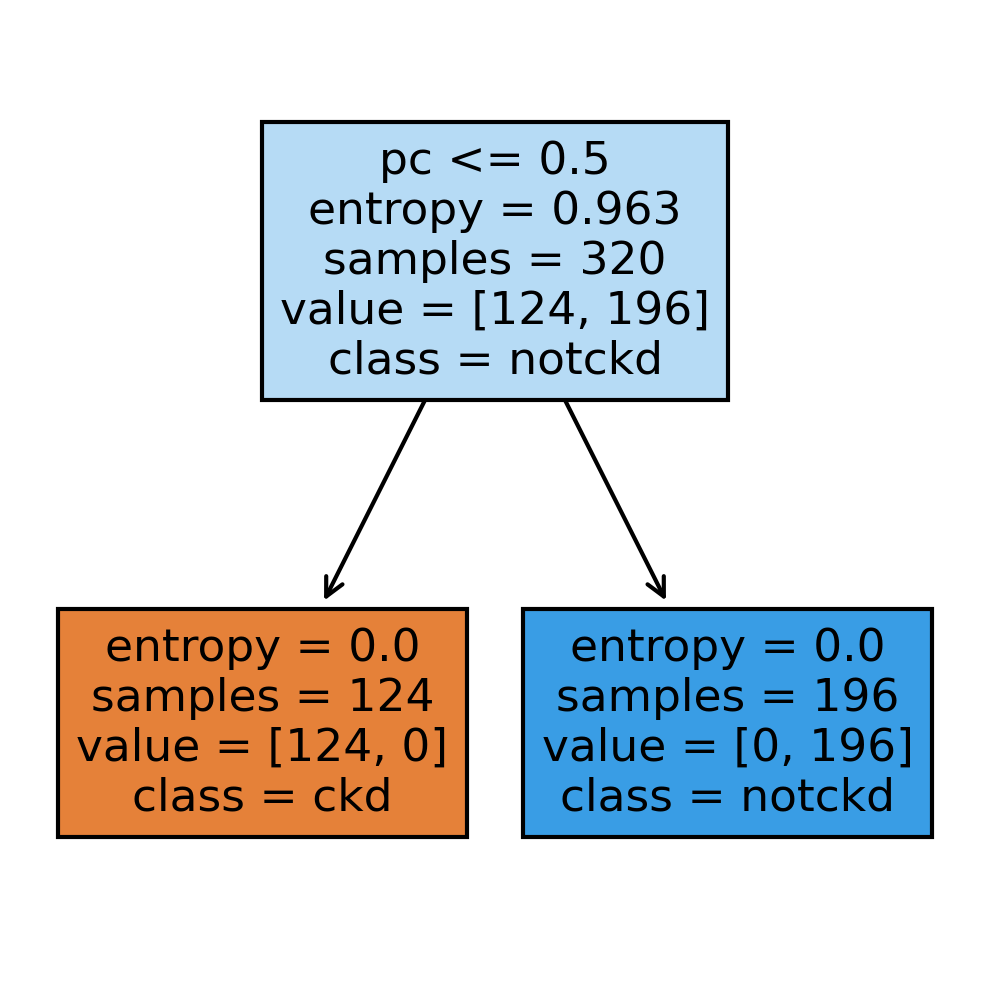

In [ ]:
# For better visualization of Decision Tree
fig=plt.figure(figsize=(4,4),dpi=300)
fn=['age', 'bp', 'sg', 'al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane', 'class']
cn=['ckd', 'notckd']
tree.plot_tree(model_entropy,feature_names=fn,class_names=cn,filled=True)

In [ ]:
# Predicting on test data
pred=model_entropy.predict(x_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
pd.Series(pred).value_counts() # For value_count of array

1    54
0    26
dtype: int64

In [ ]:
y_test.value_counts()

1    54
0    26
Name: class, dtype: int64

In [ ]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,pred)

col_0,0,1
class,,
0,26,0
1,0,54


In [ ]:
# C5.0 Entropy - Test Model Accuracy
acc = model_entropy.score(x_test,y_test)

In [ ]:
print("Accuracy : ",acc*100,'%')

Accuracy :  100.0 %


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred)
f_measure = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
gini_coefficient = 2 * roc_auc_score(y_test, pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


# **KNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv("Filter_Output.csv")
df.head()

,bgr,sc,hemo,pcv,rbcc,dm,class
0,121.000000,1.2,15.4,44.0,5.200000,1.0,1
1,148.036517,0.8,11.3,38.0,4.707435,0.0,1
2,423.000000,1.8,9.6,31.0,4.707435,1.0,1
3,117.000000,3.8,11.2,32.0,3.900000,0.0,1
4,106.000000,1.4,11.6,35.0,4.600000,0.0,1


In [ ]:
df.shape

(400, 7)

In [ ]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

In [ ]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print(y_pred)

[1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1
 1 1 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  93.75
Precision:  97.95918367346938
Recall:  92.3076923076923
F-measure:  95.05
AUC:  94.37
Gini coefficient:  88.74


# **RANDOM TREE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv("Filter_Output.csv")

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  93.75
Precision:  100.0
Recall:  90.38461538461539
F-measure:  94.95
AUC:  95.19
Gini coefficient:  90.38
